**AIVLE School 미니프로젝트**
### **공공데이터를 활용한 <span style="color:darkgreen">미세먼지 농도</span> 예측**
---

#### **<span style="color:red">[미션 안내]</span>**
* 개인 미션: 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요. <br> ([1-1]부터 [1-2]까지, [2-1]부터 [2-8]까지, [3-1]부터 [3-2]까지 필수 수행, [4-1]부터 선택 수행)
* 조별 미션: 개인 미션 수행한 내용에 대해 토론하여 발표 준비를 해주세요.

#### **<span style="color:red">[데이터 설명]</span>**

* 학습 데이터
    * air_2021.csv : 2021년 미세먼지 데이터
    * weather_2021.csv : 2021년 날씨 데이터
* 테스트 데이터
    * air_2022.csv : 2022년 미세먼지 데이터
    * weather_2022.csv : 2022년 날씨 데이터

# [Step 1] 탐색적 데이터 분석

In [35]:
# 필요한 라이브러리 설치 및 임포트
!pip install pandas

import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

---

#### **<span style="color:blue">[1-1] air_21, air_22, weather_21, weather_22 데이터 로딩</span>**

In [36]:
# 데이터 로딩

air_21 = pd.read_csv("air_2021.csv", sep=',', index_col = 0, encoding = 'utf-8' )
air_22 = pd.read_csv("air_2022.csv", sep=',', index_col = 0, encoding = 'utf-8' )
weather_21 = pd.read_csv("weather_2021.csv", sep = ',', encoding='cp949')
weather_22 = pd.read_csv("weather_2022.csv", sep = ',', encoding='cp949')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-p

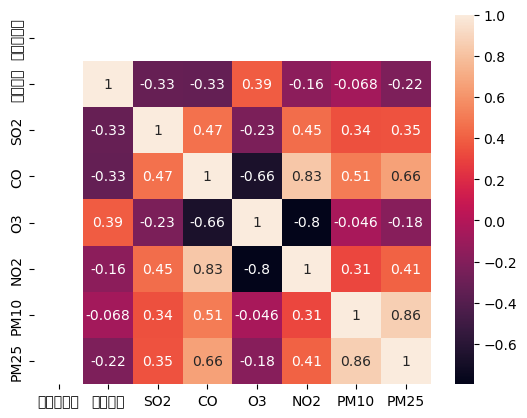

In [37]:
sns.heatmap(air_22.corr(numeric_only=True), annot=True)
plt.show()

In [38]:
air_21['측정일시']

0       2021100101
1       2021100102
2       2021100103
3       2021100104
4       2021100105
           ...    
8755    2021093020
8756    2021093021
8757    2021093022
8758    2021093023
8759    2021093024
Name: 측정일시, Length: 8760, dtype: int64

#### **<span style="color:blue">[1-2] 필요한 데이터 분석 진행 </span>**

In [39]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
# head, tail, info, plot을 활용한 시각화 등 진행
air_21.info()
air_22.info()
weather_21.info()
weather_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      2160 non-null   object 
 1   망       2160 non-null   object 
 2   측정소코드   2160 non-null   int64  
 3   측정소명    2160 n

# [Step 2] 데이터 전처리

#### **<span style="color:blue">[2-1] air_21, air_22 의 '측정일시'를 활용하여 'time' 변수 생성</span>**

* air_21, air_22  각각 '측정일시'를 활용하여 'time'변수 생성
    * 참고: 미세먼지 데이터는 1시-24시, 날씨 데이터는 0시-23시로 구성되어 있습니다. [2-3]에서 미세먼지와 날씨 데이터를 time 기준으로 합치려면 기준이 동일해야 합니다. 미세먼지 데이터에서 time 변수 생성 시 이를 미리 고려(예: air_21['측정일시'] -1)하세요.
* time 변수를 pd.to_datetime으로 데이터 타입 변경
    * 참고: format = '%Y%m%d%H'

In [40]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
import pandas as pd

air_21['time'] = pd.to_datetime(air_21['측정일시'], format='%Y%m%d%H', errors='coerce')
air_21['time'] = air_21['time'] - pd.DateOffset(hours=1)
air_22['time'] = pd.to_datetime(air_22['측정일시'], format='%Y%m%d%H', errors='coerce')

# 'time' 변수를 datetime 데이터 타입으로 변경
air_21['time'] = pd.to_datetime(air_21['time'], format='%Y%m%d%H')
air_22['time'] = pd.to_datetime(air_22['time'], format='%Y%m%d%H')

air_21.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19,2021-10-01 00:00:00
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19,2021-10-01 01:00:00
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19,2021-10-01 02:00:00
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19,2021-10-01 03:00:00
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19,2021-10-01 04:00:00


---

#### **<span style="color:blue">[2-2] weather_21, weather_22 의 '일시'를 활용하여 'time' 변수 생성</span>**

* weather_21, weather_22 의 '일시'를 활용하여 'time'변수 생성
* time 변수를 pd.to_datetime으로 데이터 타입 변경

In [41]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

weather_21['time'] = pd.to_datetime(weather_21['일시'], format='%Y-%m-%d %H:%M:%S')
weather_22['time'] = pd.to_datetime(weather_22['일시'], format='%Y-%m-%d %H:%M:%S')

weather_21['time'] = pd.to_datetime(weather_21['time'], format='%Y-%m-%d %H:%M:%S')
weather_22['time'] = pd.to_datetime(weather_22['time'], format='%Y-%m-%d %H:%M:%S')

weather_21.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,...,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6,2021-01-01 01:00:00
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,...,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6,2021-01-01 02:00:00
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,...,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6,2021-01-01 03:00:00
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,...,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5,2021-01-01 04:00:00
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,...,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5,2021-01-01 05:00:00


---

#### **<span style="color:blue">[2-3] 'time' 기준으로 데이터 합치기</span>**

* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보세요.
    * df_21에는 'time' 기준으로 21년도 미세먼지, 날씨 데이터를 합쳐보세요.
    * df_22에는 'time' 기준으로 22년도 미세먼지, 날씨 데이터를 합쳐보세요.

In [42]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
df_21 = pd.merge(air_21, weather_21, on='time', how='inner')
df_22 = pd.merge(air_22, weather_22, on='time', how='inner')

In [43]:
df_21['time']

0      2021-10-01 00:00:00
1      2021-10-01 01:00:00
2      2021-10-01 02:00:00
3      2021-10-01 03:00:00
4      2021-10-01 04:00:00
               ...        
8389   2021-09-30 18:00:00
8390   2021-09-30 19:00:00
8391   2021-09-30 20:00:00
8392   2021-09-30 21:00:00
8393   2021-09-30 22:00:00
Name: time, Length: 8394, dtype: datetime64[ns]

#### **<span style="color:blue">[2-4] 사용하지 않을 변수 제거</span>**

* 머신러닝에 사용하지 않을 변수들을 제거해줍니다.
    * df_21, df_22에 사용할 변수들만 넣어보세요.
* time 변수를 index로 세팅하고 (set_index) 데이터가 정렬되어 있지 않으므로 index 기준으로 정렬하세요. (sort_index)

In [44]:
# time 변수를 index로 세팅
# 사용할 변수 선택 (예시로 몇 개의 변수를 선택하고 나머지는 삭제)
variables_to_keep = ['time', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '전운량(10분위)', '시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)', '30cm 지중온도(°C)', 'PM10', 'PM25']

# df_21에서 사용할 변수만 선택하고 나머지는 삭제
df_21 = df_21[variables_to_keep]

# df_22에서 사용할 변수만 선택하고 나머지는 삭제
df_22 = df_22[variables_to_keep]

# 'time' 변수를 인덱스로 설정하고 데이터를 정렬
df_21 = df_21.set_index('time').sort_index()
df_22 = df_22.set_index('time').sort_index()

In [45]:
df_21.head()

,기온(°C),강수량(mm),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),30cm 지중온도(°C),PM10,PM25
time,,,,,,,,,,,,,,,
2021-01-01 01:00:00,-8.7,NaN,2.4,68,2.2,-13.5,1016.4,1027.7,0.0,2000,-6.9,-1.0,1.6,25.0,14.0
2021-01-01 02:00:00,-9.1,NaN,1.6,69,2.1,-13.7,1016.2,1027.5,0.0,2000,-7.1,-1.1,1.6,27.0,16.0
2021-01-01 03:00:00,-9.3,NaN,1.1,70,2.1,-13.7,1016.8,1028.1,0.0,2000,-7.3,-1.2,1.6,23.0,13.0
2021-01-01 04:00:00,-9.3,NaN,0.3,71,2.2,-13.5,1016.2,1027.5,0.0,2000,-7.5,-1.3,1.5,24.0,14.0
2021-01-01 05:00:00,-9.7,NaN,1.9,72,2.1,-13.8,1015.6,1026.9,0.0,2000,-7.6,-1.3,1.5,26.0,16.0


---

#### **<span style="color:blue">[2-5] 변수들의 결측치 처리</span>**

In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [47]:
# df_21, df_22의 결측치 확인
df_21.isna().sum()

기온(°C)              0
강수량(mm)          7473
풍속(m/s)             2
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
전운량(10분위)           2
시정(10m)             0
지면온도(°C)            4
5cm 지중온도(°C)        4
30cm 지중온도(°C)       4
PM10              104
PM25               96
dtype: int64

In [48]:
df_22.isna().sum()

기온(°C)              0
강수량(mm)          1996
풍속(m/s)             0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
전운량(10분위)           0
시정(10m)             0
지면온도(°C)            0
5cm 지중온도(°C)        0
30cm 지중온도(°C)       0
PM10               38
PM25               25
dtype: int64

In [49]:
# df_21, df_22의 변수 중 결측치를 처리 (ex: 강수량(mm))

# 강수량(mm)가 0 이상인 경우 '강수여부' 변수에 1을 할당, 그 외에는 0을 할당
df_21['강수여부'] = df_21['강수량(mm)'].apply(lambda x: 1 if x >= 0 else 0)
df_22['강수여부'] = df_22['강수량(mm)'].apply(lambda x: 1 if x >= 0 else 0)

# '강수량(mm)' 변수 삭제
df_21 = df_21.drop(columns=['강수량(mm)'])
df_22 = df_22.drop(columns=['강수량(mm)'])

In [50]:
# df_21, df_22의 남은 결측치를 처리
df_21.isna().sum()

기온(°C)             0
풍속(m/s)            2
습도(%)              0
증기압(hPa)           0
이슬점온도(°C)          0
현지기압(hPa)          0
해면기압(hPa)          0
전운량(10분위)          2
시정(10m)            0
지면온도(°C)           4
5cm 지중온도(°C)       4
30cm 지중온도(°C)      4
PM10             104
PM25              96
강수여부               0
dtype: int64

In [51]:
df_22.isna().sum()

기온(°C)            0
풍속(m/s)           0
습도(%)             0
증기압(hPa)          0
이슬점온도(°C)         0
현지기압(hPa)         0
해면기압(hPa)         0
전운량(10분위)         0
시정(10m)           0
지면온도(°C)          0
5cm 지중온도(°C)      0
30cm 지중온도(°C)     0
PM10             38
PM25             25
강수여부              0
dtype: int64

In [52]:
# df_21, df_22의 결측치 재확인
df_21['풍속(m/s)']

time
2021-01-01 01:00:00    2.4
2021-01-01 02:00:00    1.6
2021-01-01 03:00:00    1.1
2021-01-01 04:00:00    0.3
2021-01-01 05:00:00    1.9
                      ... 
2021-12-31 18:00:00    2.2
2021-12-31 19:00:00    2.2
2021-12-31 20:00:00    4.1
2021-12-31 21:00:00    4.8
2021-12-31 22:00:00    3.0
Name: 풍속(m/s), Length: 8394, dtype: float64

In [53]:
df_21.fillna(method='ffill', inplace=True)
df_22.fillna(method='ffill', inplace=True)

In [54]:
df_21.isna().sum()

기온(°C)           0
풍속(m/s)          0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
전운량(10분위)        0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
30cm 지중온도(°C)    0
PM10             0
PM25             0
강수여부             0
dtype: int64

In [55]:
df_22.isna().sum()

기온(°C)           0
풍속(m/s)          0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
전운량(10분위)        0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
30cm 지중온도(°C)    0
PM10             0
PM25             0
강수여부             0
dtype: int64

---

#### **<span style="color:blue">[2-6] 전일 같은 시간 미세먼지 농도 변수 추가</span>**

* 먼저 df_21, df_22에 month, day, hour 변수를 추가하세요.
    * 예) dt.month, dt.day, dt.hour 사용 또는 datetimeindex에서는 df.index.month 등 사용 가능
* 모델링에 유용한 변수로 전일 같은 시간(24시간 전) 미세먼지 농도 변수를 추가하세요.
    * 시계열 데이터 처리를 위한 shift 연산을 참고하세요.

In [56]:
# df_21, df_22의 index(time)를 month, day, hour 로 쪼개기 (year는 필요 없음). 이후에 저장 시 index(time)은 포함하지 않음.
df_21.index = pd.to_datetime(df_21.index)
df_22.index = pd.to_datetime(df_22.index)

df_21['month'] = df_21.index.month
df_21['day'] = df_21.index.day
df_21['hour'] = df_21.index.hour

df_22['month'] = df_22.index.month
df_22['day'] = df_22.index.day
df_22['hour'] = df_22.index.hour

In [57]:
df_21['previous_day_pm25'] = df_21['PM10'].shift(24)
df_22['previous_day_pm25'] = df_22['PM10'].shift(24)

In [58]:
# df_21, df_22에 전일 같은 시간 미세먼지 농도 변수(PM10_lag1) 추가
# 전일 같은 시간은 24시간 전 입니다.
df_21['PM10_lag1'] = df_21['PM10'].shift(24)
df_22['PM10_lag1'] = df_22['PM10'].shift(24)

In [59]:
df_21.tail()

,기온(°C),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),30cm 지중온도(°C),PM10,PM25,강수여부,month,day,hour,previous_day_pm25,PM10_lag1
time,,,,,,,,,,,,,,,,,,,,
2021-12-31 18:00:00,-5.9,2.2,32,1.3,-19.9,1020.4,1031.6,0.0,2000,-3.4,-0.3,1.0,25.0,10.0,0,12,31,18,26.0,26.0
2021-12-31 19:00:00,-6.4,2.2,34,1.3,-19.7,1021.1,1032.3,0.0,2000,-4.5,-0.5,1.0,26.0,8.0,0,12,31,19,23.0,23.0
2021-12-31 20:00:00,-6.3,4.1,35,1.3,-19.2,1021.2,1032.4,0.0,2000,-5.3,-0.6,1.0,27.0,9.0,0,12,31,20,24.0,24.0
2021-12-31 21:00:00,-6.7,4.8,36,1.3,-19.3,1021.2,1032.4,0.0,2000,-5.7,-0.7,1.0,20.0,8.0,0,12,31,21,31.0,31.0
2021-12-31 22:00:00,-7.5,3.0,37,1.3,-19.7,1021.8,1033.1,0.0,2000,-6.2,-0.8,1.0,20.0,9.0,0,12,31,22,28.0,28.0


In [60]:
df_21.isna().sum()

기온(°C)                0
풍속(m/s)               0
습도(%)                 0
증기압(hPa)              0
이슬점온도(°C)             0
현지기압(hPa)             0
해면기압(hPa)             0
전운량(10분위)             0
시정(10m)               0
지면온도(°C)              0
5cm 지중온도(°C)          0
30cm 지중온도(°C)         0
PM10                  0
PM25                  0
강수여부                  0
month                 0
day                   0
hour                  0
previous_day_pm25    24
PM10_lag1            24
dtype: int64

In [61]:
df_21.dropna(subset=['previous_day_pm25', 'PM10_lag1'], inplace=True)
df_22.dropna(subset=['previous_day_pm25', 'PM10_lag1'], inplace=True)

---

#### **<span style="color:blue">[2-7] t+1 시점의 미세먼지 농도 데이터 생성</span>**

* t+1 시점은 1시간 후 입니다.
* t+1 시점의 미세먼지 농도 변수(PM10_1)를 생성하세요.
* t+1 시점의 미세먼지 농도는 머신러닝 모델을 통해 예측하려는 y값(target) 입니다.

In [28]:
# df_21, df_22에 t+1 시점 변수(PM10_1) 추가
# t+1 시점의 미세먼지 농도 변수(PM10_1) 생성
df_21['PM10_1'] = df_21['PM10'].shift(-1) 
df_22['PM10_1'] = df_22['PM10'].shift(-1)

In [29]:
# 결측치가 있다면 처리

df_21.dropna(subset=['PM10_1'], inplace=True)
df_22.dropna(subset=['PM10_1'], inplace=True)

---

In [30]:
df_21.isna().sum()
df_22.isna().sum()

기온(°C)               0
풍속(m/s)              0
습도(%)                0
증기압(hPa)             0
이슬점온도(°C)            0
현지기압(hPa)            0
해면기압(hPa)            0
전운량(10분위)            0
시정(10m)              0
지면온도(°C)             0
5cm 지중온도(°C)         0
30cm 지중온도(°C)        0
PM10                 0
PM25                 0
강수여부                 0
month                0
day                  0
hour                 0
previous_day_pm25    0
PM10_lag1            0
PM10_1               0
dtype: int64

In [31]:
df_21.head()

,기온(°C),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C),...,30cm 지중온도(°C),PM10,PM25,강수여부,month,day,hour,previous_day_pm25,PM10_lag1,PM10_1
time,,,,,,,,,,,,,,,,,,,,,
2021-01-02 02:00:00,-5.0,2.7,42,1.8,-15.9,1015.5,1026.6,0.0,2000,-5.3,...,1.3,29.0,12.0,0,1,2,2,25.0,25.0,24.0
2021-01-02 03:00:00,-5.8,1.9,45,1.8,-15.8,1015.8,1026.9,0.0,2000,-5.9,...,1.3,24.0,13.0,0,1,2,3,27.0,27.0,20.0
2021-01-02 04:00:00,-6.3,1.7,45,1.7,-16.3,1015.8,1027.0,0.0,2000,-6.4,...,1.3,20.0,8.0,0,1,2,4,23.0,23.0,19.0
2021-01-02 05:00:00,-6.6,1.1,40,1.5,-17.9,1016.0,1027.2,0.0,2000,-6.9,...,1.3,19.0,7.0,0,1,2,5,24.0,24.0,21.0
2021-01-02 06:00:00,-6.6,2.7,35,1.3,-19.5,1016.2,1027.4,0.0,2000,-7.2,...,1.3,21.0,8.0,0,1,2,6,26.0,26.0,19.0


In [32]:
seasons = {
    1: 4,
    2: 4,
    3: 1,
    4: 1,
    5: 1,
    6: 2,
    7: 2,
    8: 2,
    9: 3,
    10: 3,
    11: 3,
    12: 4
}

# 날짜 인덱스를 기반으로 계절 컬럼 생성
df_21['계절'] = df_21.index.month.map(seasons)
df_22['계절'] = df_22.index.month.map(seasons)

df_21

,기온(°C),풍속(m/s),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),전운량(10분위),시정(10m),지면온도(°C),...,PM10,PM25,강수여부,month,day,hour,previous_day_pm25,PM10_lag1,PM10_1,계절
time,,,,,,,,,,,,,,,,,,,,,
2021-01-02 02:00:00,-5.0,2.7,42,1.8,-15.9,1015.5,1026.6,0.0,2000,-5.3,...,29.0,12.0,0,1,2,2,25.0,25.0,24.0,4
2021-01-02 03:00:00,-5.8,1.9,45,1.8,-15.8,1015.8,1026.9,0.0,2000,-5.9,...,24.0,13.0,0,1,2,3,27.0,27.0,20.0,4
2021-01-02 04:00:00,-6.3,1.7,45,1.7,-16.3,1015.8,1027.0,0.0,2000,-6.4,...,20.0,8.0,0,1,2,4,23.0,23.0,19.0,4
2021-01-02 05:00:00,-6.6,1.1,40,1.5,-17.9,1016.0,1027.2,0.0,2000,-6.9,...,19.0,7.0,0,1,2,5,24.0,24.0,21.0,4
2021-01-02 06:00:00,-6.6,2.7,35,1.3,-19.5,1016.2,1027.4,0.0,2000,-7.2,...,21.0,8.0,0,1,2,6,26.0,26.0,19.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 17:00:00,-5.0,2.4,28,1.2,-20.7,1020.4,1031.6,0.0,2000,-1.6,...,24.0,9.0,0,12,31,17,24.0,24.0,25.0,4
2021-12-31 18:00:00,-5.9,2.2,32,1.3,-19.9,1020.4,1031.6,0.0,2000,-3.4,...,25.0,10.0,0,12,31,18,26.0,26.0,26.0,4
2021-12-31 19:00:00,-6.4,2.2,34,1.3,-19.7,1021.1,1032.3,0.0,2000,-4.5,...,26.0,8.0,0,12,31,19,23.0,23.0,27.0,4


#### **<span style="color:blue">[2-8] train, test 데이터 분리</span>**

* 21년도 데이터(df_21)를 train 데이터로 저장하세요. y 값을 제외하고 train_x로 저장한 후 y 값은 train_y로 저장하세요.
* 22년도 데이터(df_22)를 test 데이터로 저장하세요. y 값을 제외하고 test_x로 저장한 후 y 값은 test_y로 저장하세요.
* 각각의 데이터프레임을 csv 파일로 저장하세요. (train_x.csv / train_y.csv / test_x.csv / test_y.csv) (단, 인덱스 제외)
* y값은 'PM10_1' 즉, t+1 시점의 미세먼지 농도입니다.

In [33]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
# train 데이터 분할
train_x = df_21.drop(columns=['PM10_1'])
train_y = df_21['PM10_1']

# test 데이터 분할
test_x = df_22.drop(columns=['PM10_1'])
test_y = df_22['PM10_1']



In [34]:
# 각각의 데이터프레임을 csv 파일로 저장 (train_x.csv / train_y.csv / test_x.csv / test_y.csv)
train_x.to_csv('train_x.csv', index=False)
train_y.to_csv('train_y.csv', index=False, header=['PM10_1'])  # 'PM10_1' 열 이름을 지정하여 저장

test_x.to_csv('test_x.csv', index=False)
test_y.to_csv('test_y.csv', index=False, header=['PM10_1'])  # 'PM10_1' 열 이름을 지정하여 저장